# Linear Regression with multiple variables
-----

NOTE: Please read this notebook [here](https://nbviewer.jupyter.org/github/FG-33/ml-algorithms/blob/master/regression_analysis/linear_regression_multi_variable.ipynb?flush_cache=true). It is not rendered properly on Github.


This notebook was created using the concepts and ideas conveyed in Stanford's lecture/course *Machine Learning* by Andrew Ng.

## Theory

The section "with multiple variables" refers to the amount of independent variables. Therefore this version has not a single independent variable $x$ but multiple $x_1, x_2, ..., x_{n-1}$. The model changes as following:

$$\begin{eqnarray}
y = x^T\theta &&&& \text{with} && x = \begin{bmatrix} 1 \\ x_1 \\ .. \\ x_{n-1} \end{bmatrix} && \text{and} && \theta = \begin{bmatrix} \theta_0 \\ \theta_1 \\ .. \\ \theta_{n-1} \end{bmatrix}
\tag{1}
\end{eqnarray}$$

Formulating the cost function and using gradient descent to minimize it can be reused from the "with one variable" [notebook](linear_regression_one_variable.ipynb).

-----

## The Implementation

In [1]:
import numpy as np

def h(x, theta):
    """ Calculate the estimated values.
    
    :param x: input data, feature matrix
    :param theta: the estimated linear model's parameters
    :return estimated values: estimated values based on the given model parameters theta
    """
    return np.matmul(x, theta)

def compute_costs(x, y, theta):
    """ Calculates the squared error between ground truth y and predicted output y'

    :param x: input data, feature matrix
    :param y: output data, ground truth
    :param theta: the estimated linear model's parameters
    :return predicted_result: squared error
    """
    m = y.shape[0] # number of samples
    return 1/(2 * m) * sum(np.power(h(x, theta) - y, 2)) # vectorized form of (2)

def gradient_descent(x, y, theta, alpha=0.01, num_iters=100):
    """ Performs gradient descent to determine the best possible model based on given input data (x)
        and output data (y)

    :param x: input data, feature matrix
    :param y: output data, ground truth
    :param theta: initial linear model's parameters
    :param alpha: learning rate
    :param num_iters: number of iterations to run gradient descent
    :return theta: estimated linear model's parameters
    :return costs: list containing the calculated cost for each iteration
    """
    m, n = x.shape
    costs = []
    
    # also calculate for first iteration    
    costs.append(compute_costs(x, y, theta)) 
    
    for i in range(num_iters):
        # adjust theta
        theta -= alpha * (1 / m) * np.matmul(np.transpose(x), (np.matmul(x, theta) - y)) # see (7)
        # calculate cost for current iter
        costs.append(compute_costs(x, y, theta))

    return theta, costs

## The Data

<IPython.core.display.Javascript object>


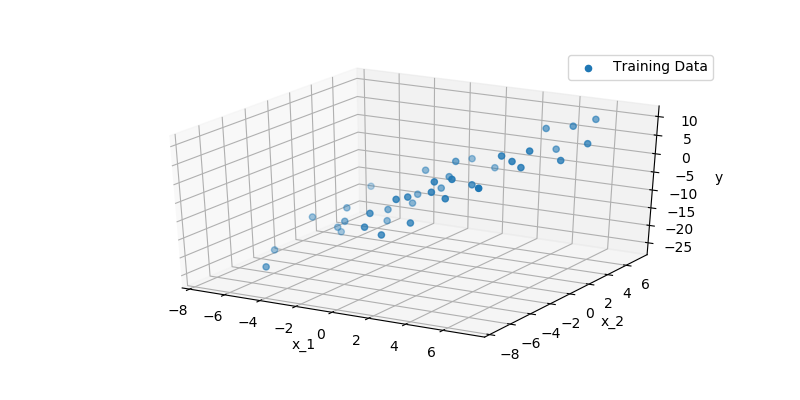

In [2]:
# Generates y values given x (has to be mx2) to demonstrate linear regression analysis with multiple variables
def generate_data(x):
    noise = np.random.random_sample((x.shape[0],)) * 10.0 - 5.0
    # basically y = theta_2 * x_2 + theta_1 * x_1 + theta_0 with noise added
    y = 2.5 * x[:,0] + 0.3 * x[:,1] - 7 + noise
    y = np.expand_dims(y, axis=1)
    return y

# Generate data
np.random.seed(4)
x = np.random.random_sample((40,2)) * 15 - 7.5
y = generate_data(x)

# Add ones column
x = np.concatenate((x, np.ones((x.shape[0], 1))), axis=1)

# Plot the data
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8,4))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('y')
ax.scatter(x[:,0], x[:,1], y)
plt.legend(["Training Data"])
plt.show()

## Regression Analysis

[[ 2.4085838 ]
 [ 0.28900337]
 [-6.59770042]]


<IPython.core.display.Javascript object>


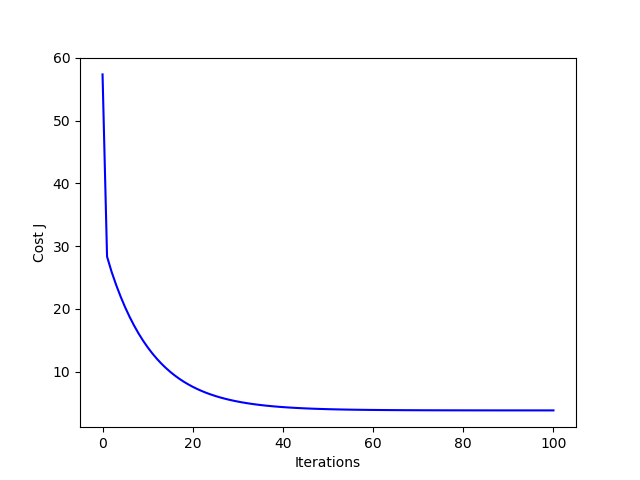

In [3]:
# Execute gradient descent
theta = np.random.rand(x.shape[1], 1)
theta, costs = gradient_descent(x, y, theta, alpha=0.05, num_iters=100)
print(theta)

# Plot the costs during gradient descent
plt.figure(2)
plt.plot(range(len(costs)), costs, "b-")
plt.xlabel("Iterations")
plt.ylabel("Cost J")
plt.show()

<IPython.core.display.Javascript object>


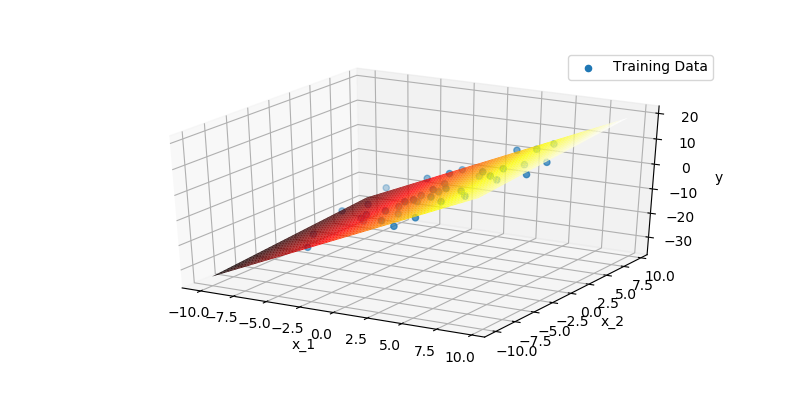

In [4]:
# Plot the training data x, y
fig = plt.figure(3, figsize=(8,4))
ax = fig.gca(projection='3d')

ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('y')
ax.scatter(x[:,0], x[:,1], y)
plt.legend(["Training Data"])

# and a visualization of the estimated model
from matplotlib import cm
x_1 = np.arange(-10, 10, 0.5)
x_2 = np.arange(-10, 10, 0.5)
x_1, x_2 = np.meshgrid(x_1, x_2)
y_ = theta[0][0] * x_1 + theta[1][0] * x_2 + theta[2][0]
ax.plot_surface(x_1, x_2, y_, cmap=cm.hot);
plt.show()

The values for $\theta$ are pretty close to the original function's parameters. Overall, it looks like the model fits the data points.